Sayama Exercise 16.2

In [ ]:
# Code from Sayama
import matplotlib
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]["state"] = 1 if random() < 0.5 else 0
    global steps
    steps = 0


def observe():
    global g
    cla()
    nx.draw(
        g, vmin=0, vmax=1, node_color=[g.nodes[i]["state"] for i in g.nodes], pos=g.pos
    )


def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]["state"] = g.nodes[speaker]["state"]

Text(0.5, 1.0, 'Voter model - original version')

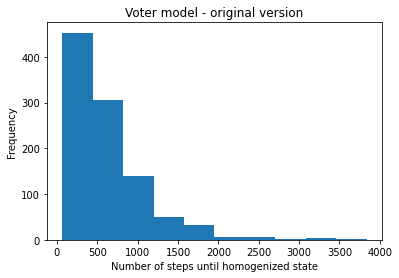

In [ ]:
import matplotlib.pyplot as plt

results_1 = []

for _ in range(1000):
    initialize()
    steps = 0
    states = set(nx.get_node_attributes(g, 'state').values())
    while len(states) != 1:
        steps += 1
        update()
        states = set(nx.get_node_attributes(g, 'state').values())
    results_1.append(steps)

plt.hist(results_1)
plt.xlabel("Number of steps until homogenized state")
plt.ylabel("Frequency")
plt.title("Voter model - original version")

Sayama Exercise 16.3

In [ ]:
def update_reverse():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]["state"] = g.nodes[speaker]["state"]

def update_edge_based():
    global g
    edge = rd.choice(list(g.edges))
    speaker, listener = random.choice(edge, 2)
    g.nodes[listener]["state"] = g.nodes[speaker]["state"]


Text(0.5, 1.0, 'Voter model - reversed version')

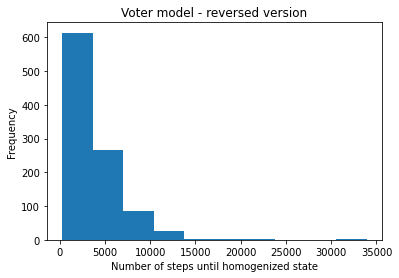

In [ ]:
results_2 = []

for _ in range(1000):
    initialize()
    steps = 0
    states = set(nx.get_node_attributes(g, 'state').values())
    while len(states) != 1:
        steps += 1
        update_reverse()
        states = set(nx.get_node_attributes(g, 'state').values())
    results_2.append(steps)

plt.hist(results_2)
plt.xlabel("Number of steps until homogenized state")
plt.ylabel("Frequency")
plt.title("Voter model - reversed version")

Text(0.5, 1.0, 'Voter model - edge-based version')

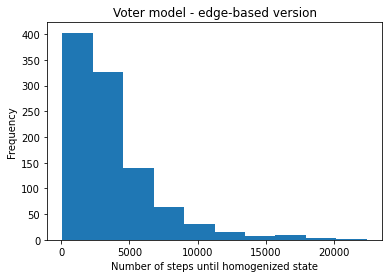

In [ ]:
results_3 = []

for _ in range(1000):
    initialize()
    steps = 0
    states = set(nx.get_node_attributes(g, 'state').values())
    while len(states) != 1:
        steps += 1
        update_reverse()
        states = set(nx.get_node_attributes(g, 'state').values())
    results_3.append(steps)

plt.hist(results_3)
plt.xlabel("Number of steps until homogenized state")
plt.ylabel("Frequency")
plt.title("Voter model - edge-based version")

In [ ]:
import numpy as np

print(f"Mean of original version of voter model: {np.mean(results_1)}")
print(f"Mean of reversed version of voter model: {np.mean(results_2)}")
print(f"Mean of edge-based version of voter model: {np.mean(results_3)}")

Mean of original version of voter model: 621.733
Mean of reversed version of voter model: 3673.253
Mean of edge-based version of voter model: 3742.501
